In [1]:
import pydicom
import matplotlib.pyplot as plt
import os
import ipywidgets as widgets
from IPython.display import display, clear_output

class DicomViewerWithIpywidgets:
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.dicom_files = self.get_dicom_files()
        self.current_index = 0

        self.slider = widgets.IntSlider(value=0, min=0, max=len(self.dicom_files) - 1, step=1, description="Image")
        self.slider.observe(self.on_slider_change, names='value')

        self.output = widgets.Output()

        display(self.slider, self.output)
        self.display_image()

    def get_dicom_files(self):
        dicom_files = []
        for root, dirs, files in os.walk(self.folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                if self.is_dicom_file(file_path):
                    dicom_files.append(file_path)
        dicom_files.sort(key=lambda x: os.path.basename(x))
        return dicom_files

    def is_dicom_file(self, file_path):
        try:
            pydicom.dcmread(file_path)
            return True
        except:
            return False

    def display_image(self):
        with self.output:
            clear_output(wait=True)  # Очистка предыдущего вывода
            dicom_file_path = self.dicom_files[self.current_index]
            dicom = pydicom.dcmread(dicom_file_path)
            pixel_array = dicom.pixel_array
            
            plt.imshow(pixel_array, cmap=plt.cm.gray)
            plt.axis('off')
            plt.title(f"File: {os.path.basename(dicom_file_path)} ({self.current_index + 1}/{len(self.dicom_files)})")
            plt.show()

    def on_slider_change(self, change):
        self.current_index = change['new']
        self.display_image()

def display_dicom_viewer_with_slider(folder_path):
    viewer = DicomViewerWithIpywidgets(folder_path)

folder_path = "DICOM"  
display_dicom_viewer_with_slider(folder_path)

IntSlider(value=0, description='Image', max=435)

Output()

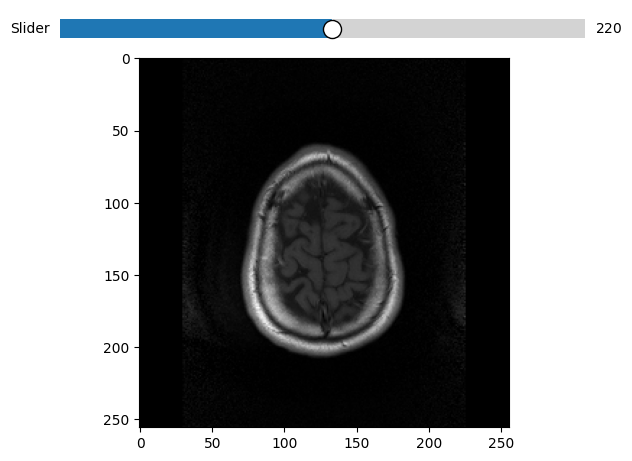

In [2]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np
import pydicom
import os


photos = [pydicom.dcmread(f"DICOM/{photo}").pixel_array for photo in os.listdir("DICOM")[:-10]]

fig, ax = plt.subplots()
a = ax.imshow(photos[220], cmap=plt.cm.gray)

slider = Slider(
	fig.add_axes([.1, .9, .82, .08]),
	"Slider",
	0,
	len(os.listdir("DICOM")) - 11,
	valinit=220,
	valstep=1,
	initcolor="w",
	handle_style={"size": 13, "edgecolor": "0"}
)

def update(val):
	a.set_array(photos[slider.val])
	fig.canvas.draw_idle()

slider.on_changed(update)

plt.show()